# <center>Métodos de Simulación en física</center>

# <center>Taller 1</center>


<center>Judol Alejandro Rodríguez Franco
<center>Samuel Guillermo Posada
<center>Juan Sebastian Cachaya
<center>Roberto German Mesias
<center>Jose Ignacio Vellojín

---
<center>Universidad Nacional De Colombia
<center>Observatorio Astonómico Nacional
<center>Facultad De Ciencias

---
# <center>Abstract</center>

<center>Notebook creado para desarrollar, explicar y presentar los ejercicios propuestos en clase; en este notebook se escriben y se corren los archivos escritos en c++ con la solución a cada punto. El archivo está creado para ser autocontenido, se puede cargar fácilmente a Google Colab y así mismo se puede ejecutar en la nube; no requiere referencia a archivos externos y todos los desarrollos, graficas, datos y demás documentos creados quedan alojados en la pestaña izquierda donde se encuentra el símbolo de la carpeta.  

</center>

---


## 3. Planetas Troyanos

### a) 

**Hemos simulado en clase el movimiento de dos cuerpos celestes. Considere que uno de ellos es Júpiter y el otro es el Sol, cuya masa es $m_{0}=1047$ veces la masa de Júpiter ($m_{1}$). Asuma que la distancia entre Júpiter y el Sol es $r=1000$ y coloque las condiciones iniciales para que el movimiento de los dos cuerpoes sea girar en círculos alrededor de su centro de msa con velocidad angular $\omega$. Cuadre el paso de tiempo $\delta t$ para que un total de 20 órbitas cierron correctamente.**

Utilizando el codigo proporcionado por el profesor, se ponen los parametros.

In [22]:
%%writefile 3a.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

//Constantes globales

const int N=2;
const double G=1.0;

//constantes de PEFRL
const double Zeta=0.1786178958448091e00;
const double Lambda=-0.2123418310626054e0;
const double Chi=-0.6626458266981849e-1;
const double Coeficiente1=(1-2*Lambda)/2;
const double Coeficiente2=1-2*(Chi+Zeta);

//Declaración de las clases
class Cuerpo;
class Colisionador;

//---------- Clase Cuerpo --------------
class Cuerpo{
private:
  vector3D r,V,F;  double m,R;
public:
  void Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0);
  void BorreFuerza(void){F.load(0,0,0);};
  void SumeFuerza(vector3D F0){F+=F0;};
  void Mueva_r(double dt,double coeficiente);
  void Mueva_V(double dt,double coeficiente);
  void Dibujese(void);
  double Getx(void){return r.x();}; //Inline
  double Gety(void){return r.y();}; //Inline
  double Getz(void){return r.z();}; //Inline
  friend class Colisionador;
};
void Cuerpo::Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0){
  r.load(x0,y0,z0);  V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::Mueva_r(double dt,double coeficiente){
  r+=V*(dt*coeficiente);
}
void Cuerpo::Mueva_V(double dt,double coeficiente){
  V+=F*(dt*coeficiente/m);
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"*sin(t)";
}
//---------- Clase Colisionador --------------
class Colisionador{
private:
public:
  void CalculeFuerzas(Cuerpo * Planeta);
  void CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2);    
};
void Colisionador::CalculeFuerzas(Cuerpo * Planeta){
  int i,j;
  //Borrar fuerzas
  for(i=0;i<N;i++)
    Planeta[i].BorreFuerza();
  //Calcular las fuerzas entre todas las parejas de planetas
  for(i=0;i<N;i++)
    for(j=i+1;j<N;j++)
      CalculeFuerzaEntre(Planeta[i],Planeta[j]);
}
void Colisionador::CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2){
  vector3D r21,n,F1; double d21,F;
  r21=Planeta2.r-Planeta1.r; d21=r21.norm(); n=r21/d21;
  F=G*Planeta1.m*Planeta2.m*pow(d21,-2.0);
  F1=F*n; Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(F1*(-1));
}

//----------- Funciones Globales -----------

void InicieAnimacion(void){
  //  cout<<"set terminal gif animate"<<endl; 
  //  cout<<"set output 'DosPlanetas.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-1100:1100]"<<endl;
  cout<<"set yrange[-1100:1100]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange [0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;  
}
void InicieCuadro(void){
    cout<<"plot 0,0 ";
}
void TermineCuadro(void){
    cout<<endl;
}


int main(){
  Cuerpo Planeta[N];
  Colisionador Newton;
  
  double m0=1047, m1=1, r=1000;
  
  double M=m0+m1, x0=-m1*r/M, x1=m0*r/M;
  
  double omega=sqrt(G*M/(r*r*r)), T=2*M_PI/omega, V0=omega*x0, V1=omega*x1;
  
  double t,tmax=20*T,dt=0.1;
  
  double tdibujo,tcuadro=T/500;
  
  double R0=100, R1=40;

  int i;
  
  //---------------(x0,y0,z0,Vx0,Vy0,Vz,m0,R0)
  Planeta[0].Inicie(x0, 0, 0,  0, V0, 0,m0,R0);
  Planeta[1].Inicie(x1, 0, 0,  0, V1, 0,m1,R1);
  
  //InicieAnimacion();
  
  cout<<"x1"<<"\t"<<"y1"<<"\t"<<"x2"<<"\t"<<"y2"<<endl;

  for(t=0,tdibujo=0; t<tmax; t+=dt,tdibujo+=dt){
    
    //Dibujar
    if(tdibujo>tcuadro){
      /*
      InicieCuadro();
      for(i=0;i<N;i++) Planeta[i].Dibujese();
      TermineCuadro();
      */  
      cout<<Planeta[0].Getx()<<"\t"<<Planeta[0].Gety()<<"\t"<<Planeta[1].Getx()<<"\t"<<Planeta[1].Gety()<<endl;
      tdibujo=0;
    }         
    
    
    // Mover por PEFRL
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Coeficiente2);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);   
  }
  
  return 0;
}


Overwriting 3a.cpp


Corremos el codigo y guaramos los datos de las trayectorias en el archivo "datos_3a.cpp"

In [23]:
%%bash 
g++ 3a.cpp
./a.out > datos_3a.dat

Importamos los datos obtenidos a python y los graficamos para comprobar que las 20 orbitas cierren correctamente.

#### Graficamos

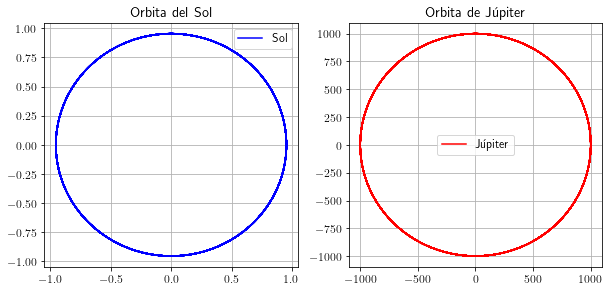

In [24]:
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': 12})

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_table("datos_3a.dat")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Orbita del Sol")
ax1.plot(datos["x1"],datos["y1"],color='blue',label='Sol')
ax1.grid()
ax1.legend()
ax2.set_title("Orbita de Júpiter")
ax2.plot(datos["x2"],datos["y2"], color='red',label='Júpiter')
ax2.grid()
ax2.legend()


Podemos ver que las orbitas cierran correctamente.

### b)

**Ahora, en vez de imprimir las coordenadas $x\; y$ de Júpiter, imprima las coordenadas ${x}_{rotado} \; {y}_{rotado}$ en un sistema que rota con Júpiter, de tal manera que tanto el Sol como Jupiter se ven quietos.**


Las coordenadas del nuevo sistema coordenado será de la forma:

$ {x}_{rotado} = x*cos(\omega t) + y*sin(\omega t)$

$ {y}_{rotado} = -x*sin(\omega t) + y*cos(\omega t)$

A partir de lo anterior, definimos dos arreglos llamados xrotado y yrotado.

In [25]:
%%writefile 3b.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

//Constantes globales

const int N=2;
const double G=1.0;

//constantes de PEFRL
const double Zeta=0.1786178958448091e00;
const double Lambda=-0.2123418310626054e0;
const double Chi=-0.6626458266981849e-1;
const double Coeficiente1=(1-2*Lambda)/2;
const double Coeficiente2=1-2*(Chi+Zeta);

//Declaración de las clases
class Cuerpo;
class Colisionador;

//---------- Clase Cuerpo --------------
class Cuerpo{
private:
  vector3D r,V,F;  double m,R;
public:
  void Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0);
  void BorreFuerza(void){F.load(0,0,0);};
  void SumeFuerza(vector3D F0){F+=F0;};
  void Mueva_r(double dt,double coeficiente);
  void Mueva_V(double dt,double coeficiente);
  void Dibujese(void);
  double Getx(void){return r.x();}; //Inline
  double Gety(void){return r.y();}; //Inline
  double Getz(void){return r.z();}; //Inline
  friend class Colisionador;
};
void Cuerpo::Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0){
  r.load(x0,y0,z0);  V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::Mueva_r(double dt,double coeficiente){
  r+=V*(dt*coeficiente);
}
void Cuerpo::Mueva_V(double dt,double coeficiente){
  V+=F*(dt*coeficiente/m);
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"*sin(t)";
}
//---------- Clase Colisionador --------------
class Colisionador{
private:
public:
  void CalculeFuerzas(Cuerpo * Planeta);
  void CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2);    
};
void Colisionador::CalculeFuerzas(Cuerpo * Planeta){
  int i,j;
  //Borrar fuerzas
  for(i=0;i<N;i++)
    Planeta[i].BorreFuerza();
  //Calcular las fuerzas entre todas las parejas de planetas
  for(i=0;i<N;i++)
    for(j=i+1;j<N;j++)
      CalculeFuerzaEntre(Planeta[i],Planeta[j]);
}
void Colisionador::CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2){
  vector3D r21,n,F1; double d21,F;
  r21=Planeta2.r-Planeta1.r; d21=r21.norm(); n=r21/d21;
  F=G*Planeta1.m*Planeta2.m*pow(d21,-2.0);
  F1=F*n; Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(F1*(-1));
}

//----------- Funciones Globales -----------

void InicieAnimacion(void){
  //  cout<<"set terminal gif animate"<<endl; 
  //  cout<<"set output 'DosPlanetas.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-1100:1100]"<<endl;
  cout<<"set yrange[-1100:1100]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange [0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;  
}
void InicieCuadro(void){
    cout<<"plot 0,0 ";
}
void TermineCuadro(void){
    cout<<endl;
}


int main(){
  Cuerpo Planeta[N];
  Colisionador Newton;
  
  double m0=1047, m1=1, r=1000;
  
  double M=m0+m1, x0=-m1*r/M, x1=m0*r/M;
  
  double omega=sqrt(G*M/(r*r*r)), T=2*M_PI/omega, V0=omega*x0, V1=omega*x1;
  
  double t,tmax=20*T,dt=0.1;
  
  double tdibujo,tcuadro=T/500;
  
  double R0=100, R1=40;

  double xrotado[N], yrotado[N];

    
  int i;
  
  //---------------(x0,y0,z0,Vx0,Vy0,Vz,m0,R0)
  Planeta[0].Inicie(x0, 0, 0,  0, V0, 0,m0,R0);
  Planeta[1].Inicie(x1, 0, 0,  0, V1, 0,m1,R1);
  
  //InicieAnimacion();
  
  cout<<"xrotado1"<<"\t"<<"yrotado1"<<"\t"<<"xrotado2"<<"\t"<<"yrotado2"<<endl;

  for(t=0,tdibujo=0; t<tmax; t+=dt,tdibujo+=dt){
    
    //Dibujar
    
    
    if(tdibujo>tcuadro){
    /*
      InicieCuadro();
      for(i=0;i<N;i++) Planeta[i].Dibujese();
      TermineCuadro();
    */
      xrotado[0]= Planeta[0].Getx()*cos(omega*t) + Planeta[0].Gety()*sin(omega*t);
      yrotado[0]= -Planeta[0].Getx()*sin(omega*t) + Planeta[0].Gety()*cos(omega*t);

      xrotado[1]= Planeta[1].Getx()*cos(omega*t) + Planeta[1].Gety()*sin(omega*t);
      yrotado[1]= -Planeta[1].Getx()*sin(omega*t) + Planeta[1].Gety()*cos(omega*t);

      cout<< xrotado[0] << "\t" << yrotado[0] << "\t" << xrotado[1] << "\t" << yrotado[1] <<endl; 

      tdibujo=0;
    }         
    



    // Mover por PEFRL
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Coeficiente2);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);   
  }
  
  return 0;
}


Overwriting 3b.cpp


Corremos el codigo y exportamos los datos al archivo 3b.dat

In [26]:
%%bash 
g++ 3b.cpp
./a.out > datos_3b.dat

Abrimos los datos en python y los graficamos

#### Graficamos

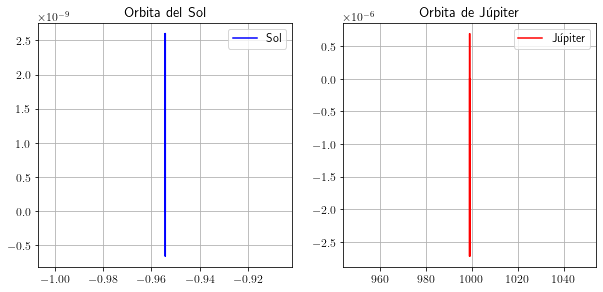

In [27]:
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': 12})

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_table("datos_3b.dat")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Orbita del Sol")
ax1.plot(datos["xrotado1"],datos["yrotado1"],color='blue',label='Sol')
ax1.grid()
ax1.legend()
ax2.set_title("Orbita de Júpiter")
ax2.plot(datos["xrotado2"],datos["yrotado2"], color='red',label='Júpiter')
ax2.grid()
ax2.legend()


### c)

**Coloque un tercer planeta de masa $m_{3} = 0.005$ en el punto de libración L4 girando con la misma rapidez que Júpiter, y compruebe que permanece aproximadamente quieto por 20 órbitas**

Agregamos la imformacion del planeta troyano al codigo,

In [31]:
%%writefile 3c.cpp




#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

//Constantes globales

const int N=3; // Sol, Júpiter y planeta troyano
const double G=1.0;

//constantes de PEFRL
const double Zeta=0.1786178958448091e00;
const double Lambda=-0.2123418310626054e0;
const double Chi=-0.6626458266981849e-1;
const double Coeficiente1=(1-2*Lambda)/2;
const double Coeficiente2=1-2*(Chi+Zeta);

//Declaración de las clases
class Cuerpo;
class Colisionador;

//---------- Clase Cuerpo --------------
class Cuerpo{
private:
  vector3D r,V,F;  double m,R;
public:
  void Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0);
  void BorreFuerza(void){F.load(0,0,0);};
  void SumeFuerza(vector3D F0){F+=F0;};
  void Mueva_r(double dt,double coeficiente);
  void Mueva_V(double dt,double coeficiente);
  void Dibujese(void);
  double Getx(void){return r.x();}; //Inline
  double Gety(void){return r.y();}; //Inline
  double Getz(void){return r.z();}; //Inline
  friend class Colisionador;
};
void Cuerpo::Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0){
  r.load(x0,y0,z0);  V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::Mueva_r(double dt,double coeficiente){
  r+=V*(dt*coeficiente);
}
void Cuerpo::Mueva_V(double dt,double coeficiente){
  V+=F*(dt*coeficiente/m);
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"*sin(t)";
}

//---------- Clase Colisionador --------------
class Colisionador{
private:
public:
  void CalculeFuerzas(Cuerpo * Planeta);
  void CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2);    
};

void Colisionador::CalculeFuerzas(Cuerpo * Planeta){
  int i,j;
  //Borrar fuerzas
  for(i=0;i<N;i++)
    Planeta[i].BorreFuerza();
  //Calcular las fuerzas entre todas las parejas de planetas
  for(i=0;i<N;i++)
    for(j=i+1;j<N;j++)
      CalculeFuerzaEntre(Planeta[i],Planeta[j]);
}
void Colisionador::CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2){
  vector3D r21,n,F1; double d21,F;
  r21=Planeta2.r-Planeta1.r; d21=r21.norm(); n=r21/d21;
  F=G*Planeta1.m*Planeta2.m*pow(d21,-2.0);
  F1=F*n; Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(F1*(-1));
}

//----------- Funciones Globales -----------

void InicieAnimacion(void){
  //  cout<<"set terminal gif animate"<<endl; 
  //  cout<<"set output 'DosPlanetas.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-1100:1100]"<<endl;
  cout<<"set yrange[-1100:1100]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange [0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;  
}
void InicieCuadro(void){
    cout<<"plot 0,0 ";
}
void TermineCuadro(void){
    cout<<endl;
}


int main(){
  Cuerpo Planeta[N];
  Colisionador Newton;
  
  double m0=1047, m1=1, m2=0.005, r=1000;
  
  double M=m0+m1, x0=-m1*r/M, x1=m0*r/M;
  
  double omega=sqrt(G*M/(r*r*r)), T=2*M_PI/omega, V0=omega*x0, V1=omega*x1;
  
  double t,tmax=20*T,dt=0.01;
  
  double tdibujo,tcuadro=T/500;
  
  double R0=100, R1=40;

  double xrotado[N], yrotado[N];

  int i;

  double theta0=M_PI/3;

  double x2=x1*cos(theta0),y2=x1*sin(theta0),vx2=-V1*sin(theta0),vy2=V1*cos(theta0);

  //---------------(x0,y0,z0,Vx0,Vy0,Vz,m0,R0)
  Planeta[0].Inicie(x0, 0, 0,  0, V0, 0,m0,R0);
  Planeta[1].Inicie(x1, 0, 0,  0, V1, 0,m1,R1);
  Planeta[2].Inicie(x2, y2, 0, vx2 ,vy2, 0 , m2, R1);

  //InicieAnimacion();
  
  cout<<"xrotado1"<<"\t"<<"yrotado1"<<"\t"<<"xrotado2"<<"\t"<<"yrotado2"<<"\t"<<"xrotado3"<<"\t"<<"yrotado3"<<endl;

  for(t=0,tdibujo=0; t<tmax; t+=dt,tdibujo+=dt){
    
    //Dibujar
    
    
    if(tdibujo>tcuadro){
    /*
      InicieCuadro();
      for(i=0;i<N;i++) Planeta[i].Dibujese();
      TermineCuadro();
    */
      xrotado[0]= Planeta[0].Getx()*cos(omega*t) + Planeta[0].Gety()*sin(omega*t);
      yrotado[0]= -Planeta[0].Getx()*sin(omega*t) + Planeta[0].Gety()*cos(omega*t);

      xrotado[1]= Planeta[1].Getx()*cos(omega*t) + Planeta[1].Gety()*sin(omega*t);
      yrotado[1]= -Planeta[1].Getx()*sin(omega*t) + Planeta[1].Gety()*cos(omega*t);

      xrotado[2]= Planeta[2].Getx()*cos(omega*t) + Planeta[2].Gety()*sin(omega*t);
      yrotado[2]= -Planeta[2].Getx()*sin(omega*t) + Planeta[2].Gety()*cos(omega*t);


      cout<< xrotado[0] << "\t" << yrotado[0] << "\t" << xrotado[1] << "\t" << yrotado[1]<<"\t" << xrotado[2] << "\t" << yrotado[2]<<endl; 

      tdibujo=0;
    }         
    



    // Mover por PEFRL
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Coeficiente2);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);   
  }
  
  return 0;
}

Overwriting 3c.cpp


In [4]:
%%bash 
g++ 3c.cpp
./a.out > datos_3c.dat

#### Graficamos

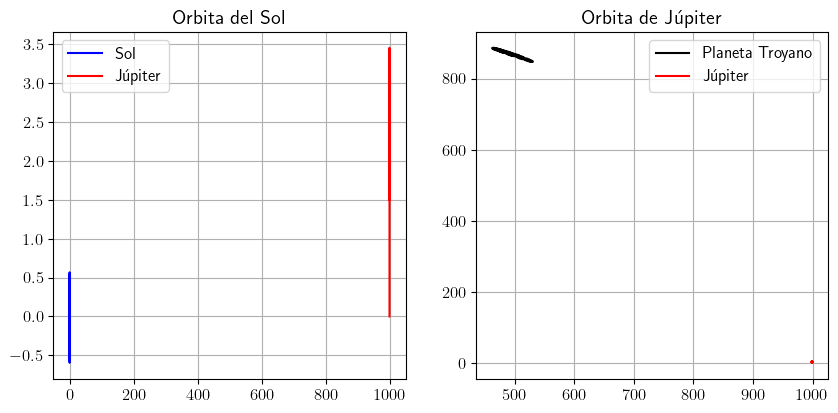

In [36]:
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': 12})

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_table("datos_3c.dat")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Orbita del Sol")
ax1.plot(datos["xrotado1"],datos["yrotado1"],color='blue',label='Sol')
ax1.plot(datos["xrotado2"],datos["yrotado2"], color='red',label='Júpiter')
ax1.grid()
ax1.legend()

ax2.set_title("Orbita de Júpiter")
ax2.plot(datos["xrotado3"],datos["yrotado3"], color='black',label='Planeta Troyano')
ax2.plot(datos["xrotado2"],datos["yrotado2"], color='red',label='Júpiter')
ax2.grid()
ax2.legend()


### d)

**Perturbe un poco la posicion o la velocidad inicial del planeta troyano y observe que el planeta dibuja en el sistema rotante una trayectoria en esperial.**

In [40]:
%%writefile 3d.cpp





#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

//Constantes globales

const int N=3; // Sol, Júpiter y planeta troyano
const double G=1.0;

//constantes de PEFRL
const double Zeta=0.1786178958448091e00;
const double Lambda=-0.2123418310626054e0;
const double Chi=-0.6626458266981849e-1;
const double Coeficiente1=(1-2*Lambda)/2;
const double Coeficiente2=1-2*(Chi+Zeta);

//Declaración de las clases
class Cuerpo;
class Colisionador;

//---------- Clase Cuerpo --------------
class Cuerpo{
private:
  vector3D r,V,F;  double m,R;
public:
  void Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0);
  void BorreFuerza(void){F.load(0,0,0);};
  void SumeFuerza(vector3D F0){F+=F0;};
  void Mueva_r(double dt,double coeficiente);
  void Mueva_V(double dt,double coeficiente);
  void Dibujese(void);
  double Getx(void){return r.x();}; //Inline
  double Gety(void){return r.y();}; //Inline
  double Getz(void){return r.z();}; //Inline
  friend class Colisionador;
};
void Cuerpo::Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0){
  r.load(x0,y0,z0);  V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::Mueva_r(double dt,double coeficiente){
  r+=V*(dt*coeficiente);
}
void Cuerpo::Mueva_V(double dt,double coeficiente){
  V+=F*(dt*coeficiente/m);
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"*sin(t)";
}

//---------- Clase Colisionador --------------
class Colisionador{
private:
public:
  void CalculeFuerzas(Cuerpo * Planeta);
  void CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2);    
};

void Colisionador::CalculeFuerzas(Cuerpo * Planeta){
  int i,j;
  //Borrar fuerzas
  for(i=0;i<N;i++)
    Planeta[i].BorreFuerza();
  //Calcular las fuerzas entre todas las parejas de planetas
  for(i=0;i<N;i++)
    for(j=i+1;j<N;j++)
      CalculeFuerzaEntre(Planeta[i],Planeta[j]);
}
void Colisionador::CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2){
  vector3D r21,n,F1; double d21,F;
  r21=Planeta2.r-Planeta1.r; d21=r21.norm(); n=r21/d21;
  F=G*Planeta1.m*Planeta2.m*pow(d21,-2.0);
  F1=F*n; Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(F1*(-1));
}

//----------- Funciones Globales -----------

void InicieAnimacion(void){
  //  cout<<"set terminal gif animate"<<endl; 
  //  cout<<"set output 'DosPlanetas.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-1100:1100]"<<endl;
  cout<<"set yrange[-1100:1100]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange [0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;  
}
void InicieCuadro(void){
    cout<<"plot 0,0 ";
}
void TermineCuadro(void){
    cout<<endl;
}


int main(){
  Cuerpo Planeta[N];
  Colisionador Newton;
  
  double m0=1047, m1=1, m2=0.005, r=1000;
  
  double M=m0+m1, x0=-m1*r/M, x1=m0*r/M;
  
  double omega=sqrt(G*M/(r*r*r)), T=2*M_PI/omega, V0=omega*x0, V1=omega*x1;
  
  double t,tmax=20*T,dt=0.01;
  
  double tdibujo,tcuadro=T/500;
  
  double R0=100, R1=40;

  double xrotado[N], yrotado[N];

  int i;

  double theta0=M_PI/3;

  double x2=x1*cos(theta0),y2=x1*sin(theta0),vx2=-V1*sin(theta0),vy2=V1*cos(theta0);

  //---------------(x0,y0,z0,Vx0,Vy0,Vz,m0,R0)
  Planeta[0].Inicie(x0, 0, 0,  0, V0, 0,m0,R0);
  Planeta[1].Inicie(x1, 0, 0,  0, V1, 0,m1,R1);
  Planeta[2].Inicie(x2, y2, 0, vx2*0.9999 ,vy2*0.9999, 0 , m2, R1);

  //InicieAnimacion();
  
  cout<<"xrotado1"<<"\t"<<"yrotado1"<<"\t"<<"xrotado2"<<"\t"<<"yrotado2"<<"\t"<<"xrotado3"<<"\t"<<"yrotado3"<<endl;

  for(t=0,tdibujo=0; t<tmax; t+=dt,tdibujo+=dt){
    
    //Dibujar
    
    
    if(tdibujo>tcuadro){
    /*
      InicieCuadro();
      for(i=0;i<N;i++) Planeta[i].Dibujese();
      TermineCuadro();
    */
      xrotado[0]= Planeta[0].Getx()*cos(omega*t) + Planeta[0].Gety()*sin(omega*t);
      yrotado[0]= -Planeta[0].Getx()*sin(omega*t) + Planeta[0].Gety()*cos(omega*t);

      xrotado[1]= Planeta[1].Getx()*cos(omega*t) + Planeta[1].Gety()*sin(omega*t);
      yrotado[1]= -Planeta[1].Getx()*sin(omega*t) + Planeta[1].Gety()*cos(omega*t);

      xrotado[2]= Planeta[2].Getx()*cos(omega*t) + Planeta[2].Gety()*sin(omega*t);
      yrotado[2]= -Planeta[2].Getx()*sin(omega*t) + Planeta[2].Gety()*cos(omega*t);


      cout<< xrotado[0] << "\t" << yrotado[0] << "\t" << xrotado[1] << "\t" << yrotado[1]<<"\t" << xrotado[2] << "\t" << yrotado[2]<<endl; 

      tdibujo=0;
    }         
    



    // Mover por PEFRL
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Coeficiente2);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);   
  }
  
  return 0;
}

Overwriting 3d.cpp


In [41]:
%%bash 
g++ 3d.cpp
./a.out > datos_3d.dat

#### Graficamos

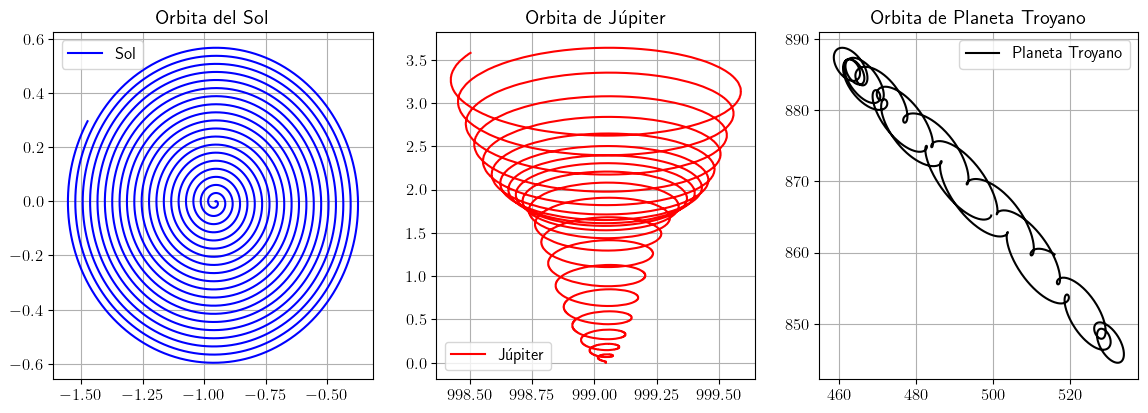

In [42]:
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': 12})

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_table("datos_3d.dat")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4.5))
ax1.set_title("Orbita del Sol")
ax1.plot(datos["xrotado1"],datos["yrotado1"],color='blue',label='Sol')
ax1.grid()
ax1.legend()

ax2.set_title("Orbita de Júpiter")
ax2.plot(datos["xrotado2"],datos["yrotado2"], color='red',label='Júpiter')
ax2.grid()
ax2.legend()

ax3.set_title("Orbita de Planeta Troyano")
ax3.plot(datos["xrotado3"],datos["yrotado3"], color='black',label='Planeta Troyano')
ax3.grid()
ax3.legend()


### e)

**Grafique la posicion x del planeta troyano en el sistema rotante en funcion del tiempo y mida aproximadamente los dos periodos. Compare los valores obtenidos con los predichos por la teoria clasica de perturbaciones.**


In [48]:
%%writefile 3e.cpp







#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

//Constantes globales

const int N=3; // Sol, Júpiter y planeta troyano
const double G=1.0;

//constantes de PEFRL
const double Zeta=0.1786178958448091e00;
const double Lambda=-0.2123418310626054e0;
const double Chi=-0.6626458266981849e-1;
const double Coeficiente1=(1-2*Lambda)/2;
const double Coeficiente2=1-2*(Chi+Zeta);

//Declaración de las clases
class Cuerpo;
class Colisionador;

//---------- Clase Cuerpo --------------
class Cuerpo{
private:
  vector3D r,V,F;  double m,R;
public:
  void Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0);
  void BorreFuerza(void){F.load(0,0,0);};
  void SumeFuerza(vector3D F0){F+=F0;};
  void Mueva_r(double dt,double coeficiente);
  void Mueva_V(double dt,double coeficiente);
  void Dibujese(void);
  double Getx(void){return r.x();}; //Inline
  double Gety(void){return r.y();}; //Inline
  double Getz(void){return r.z();}; //Inline
  friend class Colisionador;
};
void Cuerpo::Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0){
  r.load(x0,y0,z0);  V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::Mueva_r(double dt,double coeficiente){
  r+=V*(dt*coeficiente);
}
void Cuerpo::Mueva_V(double dt,double coeficiente){
  V+=F*(dt*coeficiente/m);
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"*sin(t)";
}

//---------- Clase Colisionador --------------
class Colisionador{
private:
public:
  void CalculeFuerzas(Cuerpo * Planeta);
  void CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2);    
};

void Colisionador::CalculeFuerzas(Cuerpo * Planeta){
  int i,j;
  //Borrar fuerzas
  for(i=0;i<N;i++)
    Planeta[i].BorreFuerza();
  //Calcular las fuerzas entre todas las parejas de planetas
  for(i=0;i<N;i++)
    for(j=i+1;j<N;j++)
      CalculeFuerzaEntre(Planeta[i],Planeta[j]);
}
void Colisionador::CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2){
  vector3D r21,n,F1; double d21,F;
  r21=Planeta2.r-Planeta1.r; d21=r21.norm(); n=r21/d21;
  F=G*Planeta1.m*Planeta2.m*pow(d21,-2.0);
  F1=F*n; Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(F1*(-1));
}

//----------- Funciones Globales -----------

void InicieAnimacion(void){
  //  cout<<"set terminal gif animate"<<endl; 
  //  cout<<"set output 'DosPlanetas.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-1100:1100]"<<endl;
  cout<<"set yrange[-1100:1100]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange [0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;  
}
void InicieCuadro(void){
    cout<<"plot 0,0 ";
}
void TermineCuadro(void){
    cout<<endl;
}


int main(){
  Cuerpo Planeta[N];
  Colisionador Newton;
  
  double m0=1047, m1=1, m2=0.005, r=1000;
  
  double M=m0+m1, x0=-m1*r/M, x1=m0*r/M;
  
  double omega=sqrt(G*M/(r*r*r)), T=2*M_PI/omega, V0=omega*x0, V1=omega*x1;
  
  double t,tmax=20*T,dt=0.01;
  
  double tdibujo,tcuadro=T/500;
  
  double R0=100, R1=40;

  double xrotado[N], yrotado[N];

  int i;

  double theta0=M_PI/3;

  double x2=x1*cos(theta0),y2=x1*sin(theta0),vx2=-V1*sin(theta0),vy2=V1*cos(theta0);

  //---------------(x0,y0,z0,Vx0,Vy0,Vz,m0,R0)
  Planeta[0].Inicie(x0, 0, 0,  0, V0, 0,m0,R0);
  Planeta[1].Inicie(x1, 0, 0,  0, V1, 0,m1,R1);
  Planeta[2].Inicie(x2, y2, 0, vx2*0.9999 ,vy2*0.9999, 0 , m2, R1);

  //InicieAnimacion();
  
  cout<<"xrotado1"<<"\t"<<"t"<<endl;

  for(t=0,tdibujo=0; t<tmax; t+=dt,tdibujo+=dt){
    
    //Dibujar
    
    
    if(tdibujo>tcuadro){
    /*
      InicieCuadro();
      for(i=0;i<N;i++) Planeta[i].Dibujese();
      TermineCuadro();
    */
      xrotado[0]= Planeta[0].Getx()*cos(omega*t) + Planeta[0].Gety()*sin(omega*t);
      yrotado[0]= -Planeta[0].Getx()*sin(omega*t) + Planeta[0].Gety()*cos(omega*t);

      xrotado[1]= Planeta[1].Getx()*cos(omega*t) + Planeta[1].Gety()*sin(omega*t);
      yrotado[1]= -Planeta[1].Getx()*sin(omega*t) + Planeta[1].Gety()*cos(omega*t);

      xrotado[2]= Planeta[2].Getx()*cos(omega*t) + Planeta[2].Gety()*sin(omega*t);
      yrotado[2]= -Planeta[2].Getx()*sin(omega*t) + Planeta[2].Gety()*cos(omega*t);


      //cout<< xrotado[0] << "\t" << yrotado[0] << "\t" << xrotado[1] << "\t" << yrotado[1]<<"\t" << xrotado[2] << "\t" << yrotado[2]<<endl; 
        
      cout<<xrotado[2]<<"\t"<< t <<endl;
      tdibujo=0;
    }         
    



    // Mover por PEFRL
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Coeficiente2);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Chi);
    Newton.CalculeFuerzas(Planeta);
    for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Coeficiente1);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Zeta);   
  }
  
  return 0;
}


Overwriting 3e.cpp


In [49]:
%%bash 
g++ 3e.cpp
./a.out > datos_3e.dat

#### Graficamos

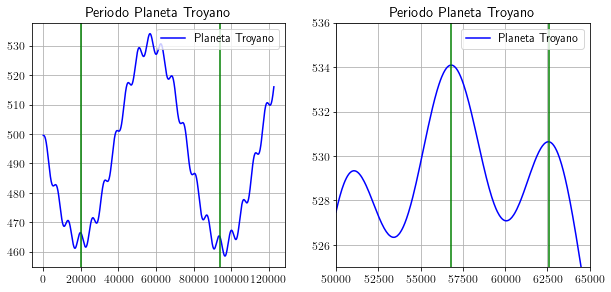

In [29]:
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': 12})

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_table("datos_3e.dat")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
ax1.set_title("Periodo Planeta Troyano")
ax1.plot(datos["t"],datos["xrotado1"],color='blue',label='Planeta Troyano')
ax1.axvline(20000,color="green")
ax1.axvline(94000,color="green")
ax1.grid()
ax1.legend()

ax2.set_title("Periodo Planeta Troyano")
ax2.plot(datos["t"],datos["xrotado1"],color='blue',label='Planeta Troyano')
ax2.set_xlim(50000,65000)
ax2.set_ylim(525,536)
ax2.axvline(56780,color="green")
ax2.axvline(62560,color="green")
ax2.grid()
ax2.legend()

El calculo teorico de estos peridos es de la siguiente forma,

$ {T}_{1} = \frac{T}{\sqrt{\frac{27}{4}\frac{m_{1}}{m_{0}}}} \approx 76440 \, s'$ 

$ {T}_{2} = \frac{T}{1-\frac{27}{4}\frac{m_{1}}{m_{0}}} \approx 6157 \, s' $

Y los obtenidos por la simulación son,

$T_{1} \approx  74000$

$T_{2} \approx 5780 $

Obteniendo unas discrepancias de, ${Error}_{{T}_{1}} = 3.2 \%$ y ${Error}_{{T}_{2}} = 6.1 \%$

### f)

**Sabiendo las unidades de trabajo, Halle a cuantos segundos correponde una unidad de tiempo, y de los periodos del punto d) en años.**

las medidas que se tomaron para el trabajo fueron $ m_{0}=1047 \, kg'$ , $m_{1}=1 \, kg'$ , $ r = 1000 \, m' $ y $ G' = 1 \, \frac{{m'}^{3}}{kg' {s'}^{2}} $

Dado que la masa de Júpiter en kilogramos es igual a $ 1,898 \cdot 10^{27} \, kg$, entonces $ 1 \, kg' = 1,898 \cdot 10^{27} \, kg  $.

Tambien sabemos que la distancia del Sol a Júpiter es de $ 7,78 \cdot \, 10^{11} \, m $ entonces $ 1 \, m' = 7,78 \cdot \, 10^{8} \, m $

Ahora, la constante universal es $G = 6,67 \cdot 10^{-11} \frac{{m}^{3}}{kg {s}^{2}}  $ entonces,

\begin{equation}
     \begin{split}
     1\;\frac{m^{\prime 3}}{kg^{\prime}*s^{\prime 2}}*(\frac{7.78*10^{8}\;m}{1\;m^{\prime}})^3*\frac{1\;kg^{\prime}}{1.898*10^{27}\;kg}=6.67*10^{-11}\;\frac{m^3}{kg*s^2}\\
         \frac{(7.78*10^{8})^3}{1.898*10^{27}}\;\frac{m^3}{kg*s^{\prime 2}}=6.67*10^{-11}\;\frac{m^3}{kg*s^2}\\
    \frac{(7.78*10^{8})^3}{1.898*10^{27}}\;\frac{1}{s^{\prime 2}}=6.67*10^{-11}\;\frac{1}{s^2}\\
     \sqrt{\frac{(7.784*10^{8})^3}{1.898*10^{27}*6.67*10^{-11}}}\;s=s^{\prime }\\
         61020\;s\approx 1\;s^{\prime }
     \end{split}
 \end{equation}           



Sabiendo a que corresponde los segundos definidos para el problema, los periodos se puedne escribir de la siguiente forma,

${T}_{1} = \frac{76440 \cdot 61020}{60 \cdot 60 \cdot 24 \cdot 365} \approx 148 \, años$

${T}_{2} = \frac{6157 \cdot 61020}{60 \cdot 60 \cdot 24 \cdot 365} \approx 12 \, años$
